# Loading an HCP subject


In [35]:
import numpy as np
import nibabel as nib
from dipy.core.gradients import gradient_table
%pylab inline
from utils import img_utils
import seaborn as sns
import utils.math_utils as mu

Populating the interactive namespace from numpy and matplotlib


In [52]:
def load_subject(index, numbers):
    subject = str(numbers[index])
    folder = './HCP/'+subject+'/'
    img = nib.load(folder+ 'data_small_12x12x12x6_'+subject+'.nii.gz')
    bvals = np.loadtxt(folder+ 'bvals_'+subject)
    bvecs = np.loadtxt(folder+'bvecs_'+subject)
    gtab = gradient_table(bvals=bvals, bvecs=bvecs)
    return img, gtab

<module 'matplotlib.pyplot' from '/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

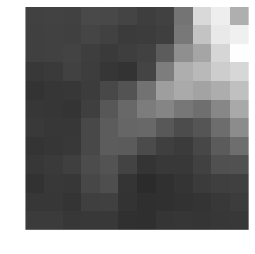

In [61]:
numbers = [100307, 100408, 180129,180432, 180836, 180937]
index = 5
img, gtab = load_subject(index, numbers)
data_n=mu.normalize(img.get_data())
img_utils._is(data_n, vmin=0, vmax=1)

In [24]:
hdr = img.header
print hdr.get_xyzt_units()
raw = hdr.structarr
print raw['xyzt_units']

#[x for x in dir(hdr) if '__' not in x]

('unknown', 'unknown')
0


In [25]:
bvals = np.loadtxt('./HCP/100307/bvals')
bvecs = np.loadtxt('./HCP/100307/bvecs')

bvals.shape, bvecs.shape

((288,), (3, 288))

In [26]:
big_delta = 0.0365  # seconds
small_delta = 0.0157  # seconds
"""
gtab = gradient_table(bvals=bvals, bvecs=bvecs,
                      small_delta=big_delta,
                      big_delta=small_delta)
"""

gtab = gradient_table(bvals=bvals[0:6], bvecs=bvecs[:, 0:6])


In [27]:
img.get_data().shape, gtab.bvecs.shape

((12, 12, 12, 6), (6, 3))

# testing the data

In [28]:
#import gc
#from dipy.data import get_data
#fimg, fbval, fbvec = get_data('small_101D')

data = img.get_data()
print data.shape

#from dipy.io import read_bvals_bvecs
#bvals, bvecs = read_bvals_bvecs(fbval, fbvec)

#from dipy.core.gradients import gradient_table
gtab = gradient_table(bvals=bvals[0:6], bvecs=bvecs[:,0:6])


(12, 12, 12, 6)


(array([ 26.,   6.,  20.,  50.,   7.,   7.,  10.,  10.,   4.,   4.]),
 array([     0.        ,   1242.51884766,   2485.03769531,   3727.55654297,
          4970.07539063,   6212.59423828,   7455.11308594,   8697.63193359,
          9940.15078125,  11182.66962891,  12425.18847656]),
 <a list of 10 Patch objects>)

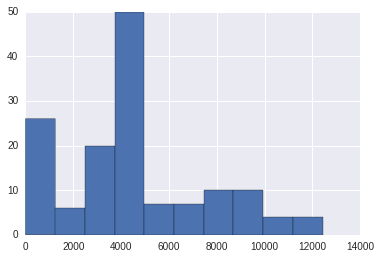

In [44]:
#img_utils._is(data, vmax=100)
data.min(), data.max(), data[:, 6, :, 0].min(), data[:, 6, :, 0].max()
data_n = mu.normalize(data)
hist(data[:, 6, :, 0].flatten())


<module 'matplotlib.pyplot' from '/user/lgomez/home/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

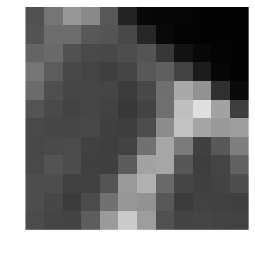

In [50]:
img_utils._is(data_n,y=12, vmin=0, vmax=1)

In [16]:
from dipy.reconst.dti import TensorModel
ten = TensorModel(gtab)

tenfit = ten.fit(data)

from dipy.reconst.dti import fractional_anisotropy
fa = fractional_anisotropy(tenfit.evals)

from dipy.reconst.dti import color_fa
RGB = color_fa(fa, tenfit.evecs)

In [17]:
cfa = RGB#[13:43, 44:74, 28:29]
cfa /= cfa.max()


from dipy.data import get_sphere
sphere = get_sphere('symmetric724')

from dipy.viz import fvtk
ren = fvtk.ren()

evals = tenfit.evals#[13:43, 44:74, 28:29]
evecs = tenfit.evecs#[13:43, 44:74, 28:29]

fvtk.add(ren, fvtk.tensor(evals, evecs, cfa, sphere))
fvtk.show(ren)

In [ ]:
fvtk.show(ren)